In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
train_df = pd.read_csv('https://raw.githubusercontent.com/IndoNLP/indonlu/refs/heads/master/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv', sep='\t')
val_df = pd.read_csv("https://raw.githubusercontent.com/IndoNLP/indonlu/refs/heads/master/dataset/smsa_doc-sentiment-prosa/valid_preprocess.tsv", sep='\t')
test_df = pd.read_csv("https://raw.githubusercontent.com/IndoNLP/indonlu/refs/heads/master/dataset/smsa_doc-sentiment-prosa/test_preprocess.tsv", sep='\t')

In [37]:
def modify_header(df):
    first_row = df.columns.tolist()
    df.columns = ["text","sentiment"]
    df.index = df.index + 1
    df = df.sort_index()
    df.head()
    return df

In [38]:
train_df = modify_header(train_df)
val_df = modify_header(val_df)
test_df = modify_header(test_df)

In [39]:
train_df.head()

,text,sentiment
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
5,"makanan beragam , harga makanan di food stall ...",positive


In [40]:
test_df.head()

,text,sentiment
1,kayak nya sih gue tidak akan mau balik lagi ke...,negative
2,"kalau dipikir-pikir , sebenarnya tidak ada yan...",negative
3,ini pertama kalinya gua ke bank buat ngurusin ...,negative
4,waktu sampai dengan gue pernah disuruh ibu lat...,negative
5,pelayanan di hotel salak bogor tidak sebagus y...,negative


# Exploratory Data Analysis

In [41]:
train_df.describe()

,text,sentiment
count,10999,10999
unique,10932,3
top,kesal,positive
freq,4,6415


In [125]:
val_df.describe()

,text,sentiment
count,1259,1259
unique,1258,3
top,enak,positive
freq,2,735


In [126]:
test_df.describe()

,text,sentiment
count,499,499
unique,499,3
top,kayak nya sih gue gila ya gue ngerti nya biar ...,positive
freq,1,208


In [42]:
train_df['sentiment'].value_counts()

sentiment
positive    6415
negative    3436
neutral     1148
Name: count, dtype: int64

In [123]:
val_df['sentiment'].value_counts()

sentiment
positive    735
negative    394
neutral     130
Name: count, dtype: int64

In [124]:
test_df['sentiment'].value_counts()

sentiment
positive    208
negative    203
neutral      88
Name: count, dtype: int64

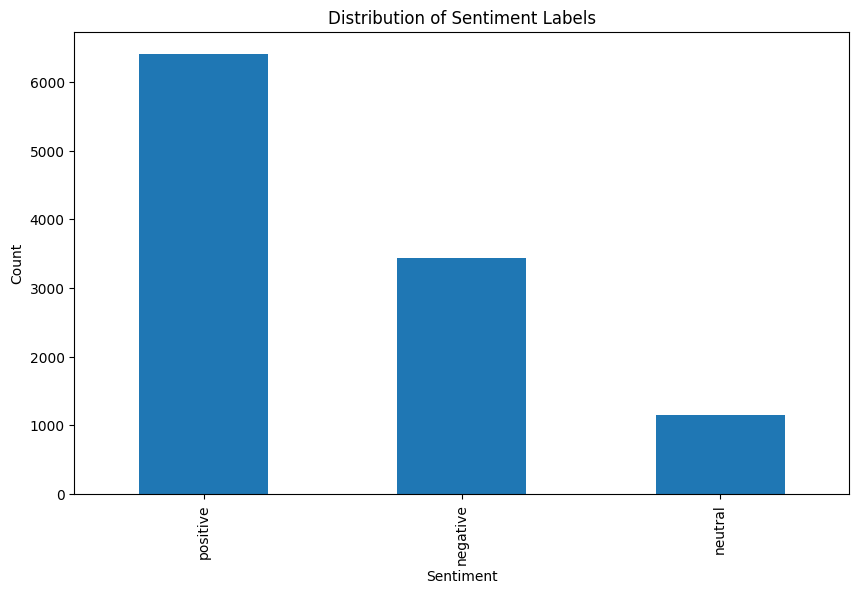

In [43]:
sentiment_counts = train_df['sentiment'].value_counts()
plt.figure(figsize=(10,6))
sentiment_counts.plot(kind="bar")
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Pre-process

In [44]:
positive_train = train_df[train_df['sentiment'] == 'positive'].sample(train_df['sentiment'].value_counts().neutral, random_state=42)
negative_train = train_df[train_df['sentiment'] == 'negative'].sample(train_df['sentiment'].value_counts().neutral, random_state=42)
neutral_train = train_df[train_df['sentiment'] == 'neutral']

In [45]:
train_df = pd.concat([positive_train, negative_train, neutral_train], axis=0, ignore_index=True)

In [46]:
train_df['sentiment'].value_counts()

sentiment
positive    1148
negative    1148
neutral     1148
Name: count, dtype: int64

## Remove Stopwords and Punctuation

In [47]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henryanand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('indonesian'))
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

In [50]:
train_df['text'] = train_df['text'].apply(remove_stopwords)

In [51]:
train_df.head()

,text,sentiment
0,resto makanan barat harga kaki ditambah pemand...,positive
1,makanan nya enak kenyang puas nilai uang sores...,positive
2,sekilas sop durian lodaya makan durian waralab...,positive
3,pas libur nasional susah duduk menikmati makan...,positive
4,bangga net tv menghadirkan programprogram tv b...,positive


In [52]:
val_df['text'] = val_df['text'].apply(remove_stopwords)
test_df['text'] = test_df['text'].apply(remove_stopwords)

## Lemmatization

In [53]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_indonesian(text):
    return stemmer.stem(text)

In [54]:
train_df['text'] = train_df['text'].apply(stem_indonesian)

In [55]:
train_df.head()

,text,sentiment
0,resto makan barat harga kaki tambah pandang al...,positive
1,makan nya enak kenyang puas nilai uang soresor...,positive
2,kilas sop durian lodaya makan durian waralaba ...,positive
3,pas libur nasional susah duduk nikmat makan ny...,positive
4,bangga net tv hadir programprogram tv kualitas,positive


In [56]:
val_df['text'] = val_df['text'].apply(stem_indonesian)
test_df['text'] = test_df['text'].apply(stem_indonesian)

## Bag of Words

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [58]:
X_train = train_df['text']
y_train = train_df['sentiment']

In [59]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [60]:
print(X_train[0])

  (0, 6011)	2
  (0, 4282)	1
  (0, 888)	1
  (0, 2701)	1
  (0, 3311)	1
  (0, 7025)	1
  (0, 5224)	1
  (0, 430)	1
  (0, 2935)	1
  (0, 6837)	1
  (0, 6105)	1
  (0, 2833)	1
  (0, 7211)	1
  (0, 1105)	1
  (0, 1314)	1
  (0, 2250)	1
  (0, 3498)	1


In [61]:
X_val = val_df['text']
y_val = val_df['sentiment']
X_test = test_df['text']
y_test = test_df['sentiment']

In [62]:
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

# Train & Validate

In [86]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [87]:
multinomialNB = MultinomialNB()
multinomialNB.fit(X_train, y_train)

MultinomialNB()

In [88]:
# Validation
y_pred = multinomialNB.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.77      0.78       394
     neutral       0.68      0.72      0.70       130
    positive       0.89      0.89      0.89       735

    accuracy                           0.84      1259
   macro avg       0.79      0.79      0.79      1259
weighted avg       0.84      0.84      0.84      1259



In [89]:
from sklearn.svm import LinearSVC

linearSVC = LinearSVC()
linearSVC.fit(X_train, y_train)
y_pred_LSVC = linearSVC.predict(X_val)
print(classification_report(y_val, y_pred_LSVC))

              precision    recall  f1-score   support

    negative       0.70      0.73      0.71       394
     neutral       0.53      0.84      0.65       130
    positive       0.90      0.78      0.84       735

    accuracy                           0.77      1259
   macro avg       0.71      0.78      0.73      1259
weighted avg       0.80      0.77      0.78      1259



/opt/homebrew/anaconda3/envs/asterisk/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

    negative       0.77      0.76      0.76       394
     neutral       0.65      0.70      0.67       130
    positive       0.90      0.89      0.89       735

    accuracy                           0.83      1259
   macro avg       0.77      0.78      0.78      1259
weighted avg       0.83      0.83      0.83      1259



## Hyperparameter Tuning

In [113]:
from scipy.sparse import vstack
X_combined = np.concatenate([train_df['text'], val_df['text']])
y_combined = np.concatenate([y_train, y_val])

In [128]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vectorizer__max_features': [1000, 5000, None],
    'vectorizer__min_df': [1, 2, 0.01],
}

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=cv)

grid_search.fit(X_combined, y_combined)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'vectorizer__max_features': 5000, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 2)}
Best CV Score: 0.8147970868036538


In [139]:
params_nb = grid_search.best_params_
vectorizer_params = {
    'max_features': params_nb['vectorizer__max_features'],
    'min_df': params_nb['vectorizer__min_df'],
    'ngram_range': params_nb['vectorizer__ngram_range']
}
vectorizerNB = CountVectorizer(**vectorizer_params)
NBTuned = MultinomialNB()
pipeline = Pipeline([
    ('vectorizer', vectorizerNB),
    ('classifier', NBTuned)
])
pipeline.fit(X_combined, y_combined)

Pipeline(steps=[('vectorizer', CountVectorizer(min_df=2, ngram_range=(1, 3))),
                ('classifier', MultinomialNB())])

In [130]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', RandomForestClassifier())
])

param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vectorizer__max_features': [1000, 5000, None],
    'vectorizer__min_df': [1, 2, 0.01],
}

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=cv)

grid_search.fit(X_combined, y_combined)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'vectorizer__max_features': None, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 3)}
Best CV Score: 0.7988545048711431


In [138]:
params_rf = grid_search.best_params_
vectorizer_params = {
    'max_features': params_rf['vectorizer__max_features'],
    'min_df': params_rf['vectorizer__min_df'],
    'ngram_range': params_rf['vectorizer__ngram_range']
}
vectorizerRF = CountVectorizer(**vectorizer_params)
RFTuned = RandomForestClassifier()
pipeline = Pipeline([
    ('vectorizer', vectorizerRF),
    ('classifier', RFTuned)
])
pipeline.fit(X_combined, y_combined)

Pipeline(steps=[('vectorizer', CountVectorizer(min_df=2, ngram_range=(1, 3))),
                ('classifier', RandomForestClassifier())])

In [134]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LinearSVC())
])

param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vectorizer__max_features': [1000, 5000, None],
    'vectorizer__min_df': [1, 2, 0.01],
}

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=cv)

grid_search.fit(X_combined, y_combined)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

/opt/homebrew/anaconda3/envs/asterisk/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/asterisk/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/anaconda3/envs/asterisk/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/asterisk/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/anaconda3/env

Best Parameters: {'vectorizer__max_features': None, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 3)}
Best CV Score: 0.7962066243418227


In [141]:
params_svc = grid_search.best_params_
vectorizer_params = {
    'max_features': params_svc['vectorizer__max_features'],
    'min_df': params_svc['vectorizer__min_df'],
    'ngram_range': params_svc['vectorizer__ngram_range']
}
vectorizerSVC = CountVectorizer(**vectorizer_params)
SVCTuned = LinearSVC()
pipeline = Pipeline([
    ('vectorizer', vectorizerSVC),
    ('classifier', SVCTuned)
])
pipeline.fit(X_combined, y_combined)

/opt/homebrew/anaconda3/envs/asterisk/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('vectorizer', CountVectorizer(min_df=2, ngram_range=(1, 3))),
                ('classifier', LinearSVC())])

# Test

In [142]:
X_test = vectorizerSVC.transform(test_df['text'])
y_pred_LSVC_test = SVCTuned.predict(X_test)
print(classification_report(y_test, y_pred_LSVC_test))

              precision    recall  f1-score   support

    negative       0.67      0.74      0.70       203
     neutral       0.46      0.73      0.56        88
    positive       0.82      0.53      0.64       208

    accuracy                           0.65       499
   macro avg       0.65      0.67      0.64       499
weighted avg       0.70      0.65      0.65       499



In [144]:
X_test = vectorizerRF.transform(test_df['text'])
y_pred_rf = RFTuned.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

    negative       0.58      0.83      0.68       203
     neutral       0.53      0.48      0.50        88
    positive       0.78      0.48      0.60       208

    accuracy                           0.62       499
   macro avg       0.63      0.60      0.59       499
weighted avg       0.65      0.62      0.61       499



In [145]:
X_test = vectorizerRF.transform(test_df['text'])
y_pred = NBTuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.59      0.85      0.69       203
     neutral       0.44      0.53      0.48        88
    positive       0.79      0.38      0.51       208

    accuracy                           0.60       499
   macro avg       0.61      0.59      0.56       499
weighted avg       0.64      0.60      0.58       499



In [96]:
y_pred_LSVC_test = linearSVCTI.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_LSVC_test))

              precision    recall  f1-score   support

    negative       0.66      0.70      0.68       203
     neutral       0.40      0.73      0.52        88
    positive       0.78      0.47      0.59       208

    accuracy                           0.61       499
   macro avg       0.62      0.63      0.60       499
weighted avg       0.67      0.61      0.61       499



In [97]:
y_pred_rf = rfTI.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

    negative       0.55      0.88      0.68       203
     neutral       0.41      0.40      0.40        88
    positive       0.81      0.35      0.48       208

    accuracy                           0.57       499
   macro avg       0.59      0.54      0.52       499
weighted avg       0.63      0.57      0.55       499



In [99]:
y_pred = multinomialNBti.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.63      0.75      0.68       203
     neutral       0.44      0.59      0.50        88
    positive       0.72      0.48      0.57       208

    accuracy                           0.61       499
   macro avg       0.60      0.61      0.59       499
weighted avg       0.63      0.61      0.61       499

